In [270]:
import os

import pandas as pd
import xgboost as xgb

In [271]:
print(f"pandas version: {pd.__version__}")
print(f"xgboost version: {xgb.__version__}")

pandas version: 1.5.1
xgboost version: 1.3.3


In [272]:
if pd.__version__ != "1.5.1":
    os.system("pip install pandas==1.5.1")

In [273]:
if xgb.__version__ != "1.3.3":
    os.system("pip install xgboost==1.3.3")

In [274]:
import pickle
import os

from datetime import datetime
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder

import xgboost as xgb

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [275]:
#from google.colab import drive
#drive.mount('/content/drive')

In [276]:
#! pip install xgboost==1.3.3

In [277]:
if xgb.__version__ != "1.3.3":
    os.system("pip install xgboost==1.3.3")

In [278]:
print("Working with these versions of libraries\n")
print("-"*50)
print(f"Numpy version {np.__version__}")
print(f"Pandas version {pd.__version__}")
print(f"XGBoost version {xgb.__version__}")

Working with these versions of libraries

--------------------------------------------------
Numpy version 1.26.2
Pandas version 1.5.1
XGBoost version 1.3.3


<a id='data_load'></a>
### Data Loading
[Volver al índice](#index)

Vamos a cargar nuestro dataset para comenzar con el EDA.

In [279]:
#google colab

#df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TFM/Predict_5.csv')
#df.sample(5)

In [280]:
df = pd.read_csv(r"C:\Users\npere\OneDrive\Desktop\Master Data Science\capstone-project\Notebooks\dataset reduccion de memoria\Predicción\Predict_10.csv")
df.sample(5)


,id,yearweek,sales,item,category,store,region,sell_price,date,date_week,...,indicator_sales_week,product_rotation_weekly,rotation_category,total_sales_week,participacion_ventas,sales_pct_change,gama,cat_gama,sales_item_region,sales_store_region
7804063,SUPERMARKET_3_573_BOS_2,201352.0,0.0,773.0,1.0,2.0,2.0,1.2000,2013-12-31,2014-01-05,...,0,0.000000,1.0,241209.0,0.000000,0.0,1.199948,2.0,0.0,27266.0
1680486,HOME_&_GARDEN_1_039_NYC_1,201221.0,1.0,1819.0,2.0,4.0,1.0,3.7125,2012-05-31,2012-05-27,...,1,0.005236,1.0,220443.0,0.000005,0.0,3.587442,1.0,19.0,26717.0
6166032,SUPERMARKET_2_384_BOS_1,201330.0,7.0,234.0,1.0,1.0,2.0,2.7360,2013-08-31,2013-08-04,...,1,0.025735,4.0,259737.0,0.000027,0.0,2.628172,1.0,39.0,22132.0
884622,ACCESORIES_1_326_BOS_1,201437.0,1.0,2106.0,3.0,1.0,2.0,2.6201,2014-09-30,2014-09-21,...,1,0.004739,1.0,249899.0,0.000004,0.0,2.622593,1.0,7.0,20654.0
7421095,SUPERMARKET_3_435_PHI_2,201545.0,0.0,1398.0,1.0,9.0,3.0,1.7760,2015-11-30,2015-11-15,...,0,0.000000,1.0,268817.0,0.000000,-1.0,1.576860,2.0,0.0,32452.0


Vamos a ver que tipo de datos tenemos en nuestro dataset.

In [282]:
#ver el tipo de formato de cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8506710 entries, 0 to 8506709
Data columns (total 26 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   id                       object 
 1   yearweek                 float64
 2   sales                    float64
 3   item                     float64
 4   category                 float64
 5   store                    float64
 6   region                   float64
 7   sell_price               float64
 8   date                     object 
 9   date_week                object 
 10  event                    float64
 11  revenue                  float64
 12  yearweek_prim_venta      float64
 13  yearweek_ult_venta       float64
 14  num_yearweek_no_sales    float64
 15  estado_id                float64
 16  indicator_sales_week     int64  
 17  product_rotation_weekly  float64
 18  rotation_category        float64
 19  total_sales_week         float64
 20  participacion_ventas     float64
 21  sales_pc

In [283]:
# convertimos a formato fecha
df["date"] = pd.to_datetime(df["date"])
df["date_week"] = pd.to_datetime(df["date_week"])

# Benchmark


Tenemos un total de 30490 Series Temporales en el dataset:

In [284]:
df["id"].nunique()

30490

In [285]:
df["item"].nunique()

3049

In [286]:
df["store"].nunique()

10

Veamos cuales son las fechas min y max de nuestro dataset:

In [287]:
MIN_DATE = df["date"].min()
MAX_DATE = df["date"].max()

In [288]:
print(f"Min date is {MIN_DATE}\nMax date is {MAX_DATE}")

Min date is 2011-01-31 00:00:00
Max date is 2016-04-30 00:00:00


In [289]:
df.isnull().sum()

id                         0
yearweek                   0
sales                      0
item                       0
category                   0
store                      0
region                     0
sell_price                 0
date                       0
date_week                  0
event                      0
revenue                    0
yearweek_prim_venta        0
yearweek_ult_venta         0
num_yearweek_no_sales      0
estado_id                  0
indicator_sales_week       0
product_rotation_weekly    0
rotation_category          0
total_sales_week           0
participacion_ventas       0
sales_pct_change           0
gama                       0
cat_gama                   0
sales_item_region          0
sales_store_region         0
dtype: int64

<a id='impute'></a>
### Data Imputation
[Volver al índice](#index)<br>

In [290]:
#ordenamos los id y date para que el modelo lo reconosca como serie temporal

df.sort_values(["id", "yearweek"], ascending = True, inplace = True)


<a id='eda'></a>
### EDA
[Volver al índice](#index)<br>

Vamos a hacer un EDA rápido para ver como son nuestras Series Temporales y coger algunas ideas para futuras variables que vamos a implementar.

Al tratarse este notebook del benchmark, vamos a explorar de manera muy superficial el dataset. En posteriores ejecuciones analizaremos el dataset en más detalle, construiremos nuevas variables y volveremos a entrenar nuestro modelo.

<a id='eda_global_sales'></a>
### --> 1. EDA: Global Sales
[Volver al índice](#index)<br>

In [291]:
def plot_ts_acf_pacf(y, title):
    '''
    Plots the ts you pass and the acf and pacf.
    '''
    fig = plt.figure(figsize = (12, 10))
    ax1, ax2, ax3 = fig.subplots(3, 1)

    ax1.plot(y)
    plot_acf(x = y, ax = ax2, lags = 14)
    plot_pacf(x = y, ax = ax3, lags = 14)

    plt.suptitle(t = title, fontsize = 20)

In [292]:
y = df.set_index("date").resample("M")["sales"].sum()[20:-1] # quitamos los registros de octubre

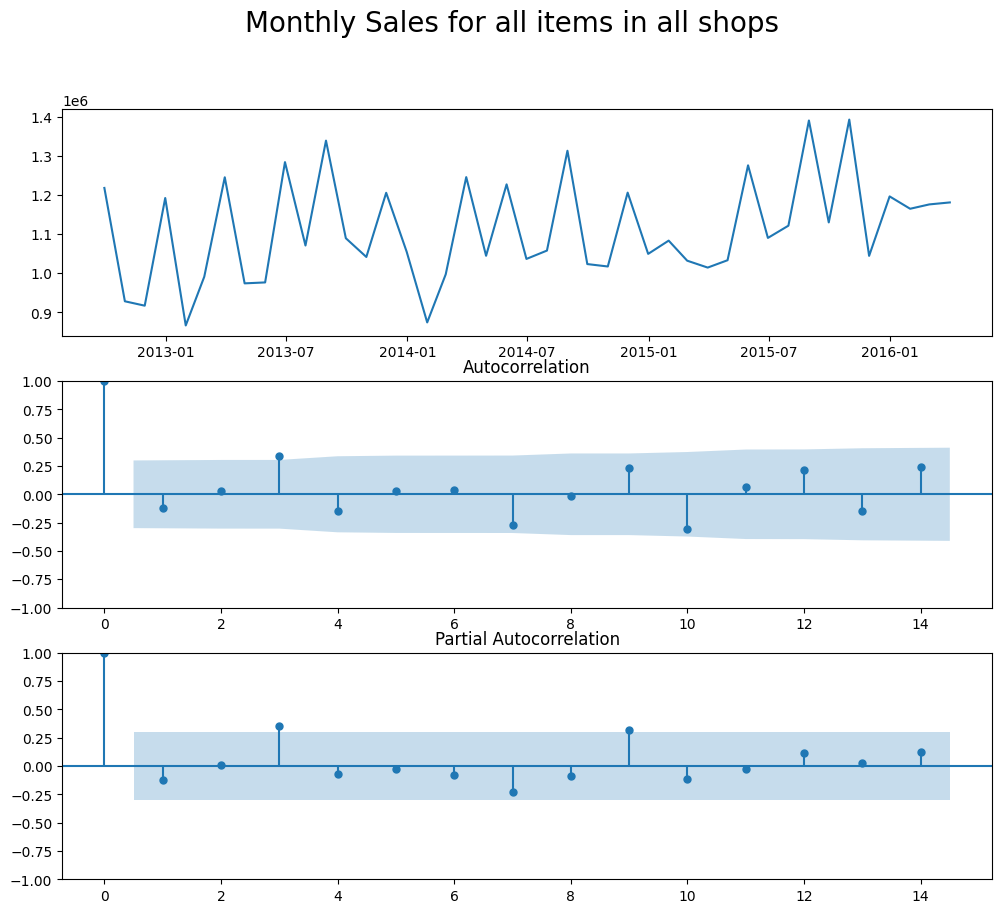

In [293]:
plot_ts_acf_pacf(y = y, title = "Monthly Sales for all items in all shops");

<a id='eda_top_3_cities'></a>
### --> 2. EDA: Top 3 Cities
[Volver al índice](#index)<br>

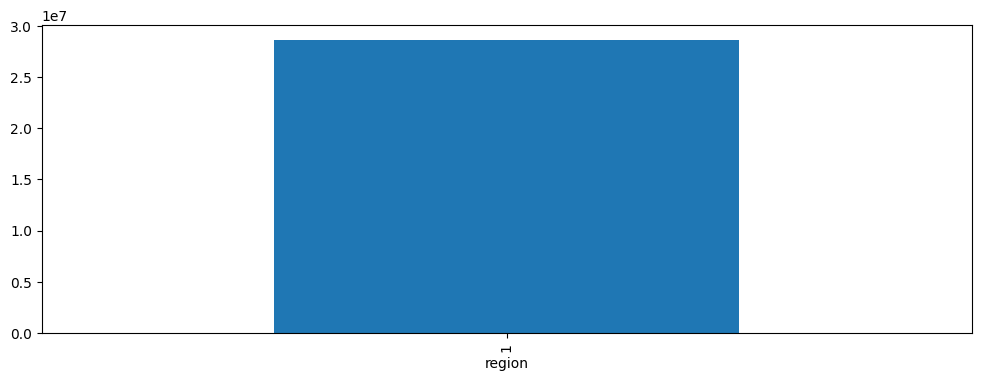

In [383]:
(
    df.
    groupby(["region"])
    ["sales"].sum()
    .sort_values(ascending = False)
    .plot(kind = "bar", figsize = (12, 4))
);

<a id='eda_top_3_categories'></a>
### --> 3. EDA: Top 3 Categories
[Volver al índice](#index)<br>

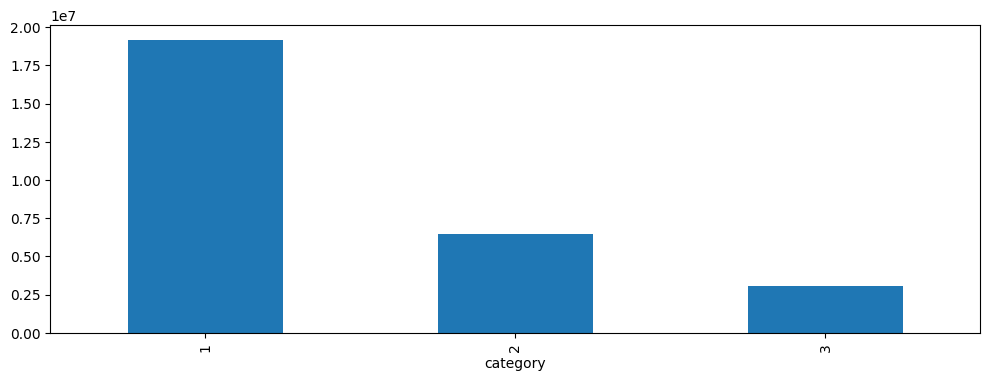

In [384]:
(
    df.
    groupby(["category"])
    ["sales"].sum()
    .sort_values(ascending = False)
    .plot(kind = "bar", figsize = (12, 4))
);

<a id='build_ts_features'></a>
### Build Time Series Features (**CORE IDEA**)
[Volver al índice](#index)<br>

Dado que vamos a tener que iterar muchas veces sobre nuestro dataset, nos interesa tener todo el código encapsulado en funciones para su reutilización.

Uno de los apartados clave será la generación de variables.

Como hemos visto antes, nuestro dataset contiene más de 400 Series Temporales.

Algunas de estas Series Temporales las podemos agrupar para sacar nueva información.

Por ejemplo, podemos construir una variables del estilo:

1. Las ventas totales por ITEM_ID (la menor granularidad posible).
2. Las ventas totales por ITEM_CATEGORY_ID y SHOP_ID (una granularidad mayor a la 1).
3. Las ventas totales por SHOP_ID (una granularidad mayor).
4. Y todas las combinaciones que queramos intermedias.

In [296]:
def build_ts_vars,(df, gb_list, target_column, agg_func, agg_func_name):

    assert "date" in df.columns.tolist(), "Date must be in df columns"

    new_name = "_".join(gb_list + [target_column] + [agg_func_name])

    gb_df_ = (df.set_index("date").groupby(gb_list).resample("M")[target_column].apply(agg_func).to_frame().reset_index().rename(
            columns = {
                target_column : new_name
             }
       )
    )

    #gb_df_[f"{new_name}_lag1"] = gb_df_.groupby(gb_list)[new_name].transform(
    #    lambda series: series.shift(1)
    #)

    gb_df_[f"{new_name}_lag3"] = gb_df_.groupby,(gb_list)[new_name].transform(
        lambda series: series.shift(3)
    )


    print(f"Dropping columns that might cause target leakage {new_name}")
    gb_df_.drop(new_name, inplace = True, axis = 1)

    return gb_df_

In [297]:
def build_ts_vars_2(df, gb_list, target_column, agg_func, agg_func_name):

    assert "date" in df.columns.tolist(), "Date must be in df columns"

    new_name = "_".join(gb_list + [target_column] + [agg_func_name])

    gb_df_ = (df.set_index("date").groupby(gb_list),.resample("M")[target_column].apply(agg_func).to_frame().reset_index().rename(
            columns = {
                target_column : new_name
             }
       )
    )

    gb_df_[f"{new_name}_lag1"] = gb_df_.groupby,(gb_list)[new_name].transform(
        lambda series: series.shift(1)
    )



    print(f"Dropping columns that might cause target leakage {new_name}")
    gb_df_.drop(new_name, inplace = True, axis = 1)

    return gb_df_

In [298]:
GB_LIST = ["item"]
TARGET_COLUMN = "sales"
AGG_FUNC = np.sum
AGG_FUNC_NAME = "sum"

vars_ts_id_sales_sum = build_ts_vars_2(
    df = df,
    gb_list = GB_LIST,
    target_column = TARGET_COLUMN,
    agg_func = AGG_FUNC,
    agg_func_name =  AGG_FUNC_NAME

)

vars_ts_id_sales_sum.head(5)

Dropping columns that might cause target leakage item_sales_sum


,item,date,item_sales_sum_lag1
0,1.0,2011-01-31,NaN
1,1.0,2011-02-28,0.0
2,1.0,2011-03-31,0.0
3,1.0,2011-04-30,0.0
4,1.0,2011-05-31,0.0


In [299]:
GB_LIST = ["item"]
TARGET_COLUMN = "sales"
AGG_FUNC = np.std
AGG_FUNC_NAME = "std"

vars_ts_id_sales_std = build_ts_vars_2(
    df = df,
    gb_list = GB_LIST,
    target_column = TARGET_COLUMN,
    agg_func = AGG_FUNC,
    agg_func_name =  AGG_FUNC_NAME

)

vars_ts_id_sales_std.head(5)

Dropping columns that might cause target leakage item_sales_std


,item,date,item_sales_std_lag1
0,1.0,2011-01-31,NaN
1,1.0,2011-02-28,0.0
2,1.0,2011-03-31,0.0
3,1.0,2011-04-30,0.0
4,1.0,2011-05-31,0.0


In [300]:
GB_LIST = ["item"]
TARGET_COLUMN = "sales"
AGG_FUNC = np.min
AGG_FUNC_NAME = "min"

vars_ts_item_revenue_min = build_ts_vars_2(
    df = df,
    gb_list = GB_LIST,
    target_column = TARGET_COLUMN,
    agg_func = AGG_FUNC,
    agg_func_name =  AGG_FUNC_NAME

)

vars_ts_item_revenue_min.head(5)

Dropping columns that might cause target leakage item_sales_min


,item,date,item_sales_min_lag1
0,1.0,2011-01-31,NaN
1,1.0,2011-02-28,0.0
2,1.0,2011-03-31,0.0
3,1.0,2011-04-30,0.0
4,1.0,2011-05-31,0.0


In [301]:
GB_LIST = ["item"]
TARGET_COLUMN = "sales"
AGG_FUNC = np.max
AGG_FUNC_NAME = "max"

vars_ts_item_revenue_max = build_ts_vars_2(
    df = df,
    gb_list = GB_LIST,
    target_column = TARGET_COLUMN,
    agg_func = AGG_FUNC,
    agg_func_name =  AGG_FUNC_NAME

)

vars_ts_item_revenue_max.head(5)

Dropping columns that might cause target leakage item_sales_max


,item,date,item_sales_max_lag1
0,1.0,2011-01-31,NaN
1,1.0,2011-02-28,0.0
2,1.0,2011-03-31,0.0
3,1.0,2011-04-30,0.0
4,1.0,2011-05-31,0.0


<a id='join_ts_features'></a>
### Join TS Features
[Volver al índice](#index)<br>

In [302]:
rows_before_merge = df.shape[0]
print(f"Shape before merge is {rows_before_merge}")

df = pd.merge(df, vars_ts_sales_sum, on = ["date"] + GB_LIST, how = "left")

df = pd.merge(df, vars_ts_sales_std, on = ["date"] + GB_LIST, how = "left")

df = pd.merge(df, vars_item_revenue_min, on = ["date"] + GB_LIST, how = "left")

df = pd.merge(df, vars_ts_revenue_max, on = ["date"] + GB_LIST, how = "left")


rows_after_merge = df.shape[0]

print(f"Shape after merge is {rows_after_merge}")

assert rows_before_merge == rows_after_merge, "You have generated a cartesian product!"

Shape before merge is 8506710
Shape after merge is 8506710


<a id='train_test_split'></a>
### Train Test Split
[Volver al índice](#index)<br>

In [303]:
df.columns.tolist()

['id',
 'yearweek',
 'sales',
 'item',
 'category',
 'store',
 'region',
 'sell_price',
 'date',
 'date_week',
 'event',
 'revenue',
 'yearweek_prim_venta',
 'yearweek_ult_venta',
 'num_yearweek_no_sales',
 'estado_id',
 'indicator_sales_week',
 'product_rotation_weekly',
 'rotation_category',
 'total_sales_week',
 'participacion_ventas',
 'sales_pct_change',
 'gama',
 'cat_gama',
 'sales_item_region',
 'sales_store_region',
 'item_sales_sum_lag1',
 'item_sales_std_lag1',
 'item_sales_min_lag1',
 'item_sales_max_lag1']

veamos que variables estan altamente correlaconadas

In [304]:
df_correlacion = df.copy()

In [305]:
df_correlacion.set_index("id", inplace = True)

In [306]:
target = 'sales'
features = df_correlacion.columns[df_correlacion.columns!=target]

# Divide dataset en matriz de variables (X) y output (y)
X = df_correlacion[features]
y = df_correlacion[target]

In [307]:
def highly_correlated(X, y, threshold):
    # Convert X to a DataFrame if it isn't one
    if not isinstance(X, pd.DataFrame):
        X = pd.DataFrame(X)

    # Ensure that y is a Series
    if not isinstance(y, pd.Series):
        y = pd.Series(y)

    # Exclude non-numeric columns from X
    numeric_cols = X.select_dtypes(include=np.number).columns.tolist()
    X_numeric = X[numeric_cols]

    # Calculate correlation matrix of the numeric features
    corr_matrix = X_numeric.corr().abs()

    col_corr = []
    colnames = []
    rownames = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] >= threshold:
                colnames.append(corr_matrix.columns[i])
                rownames.append(corr_matrix.columns[j])
                col_corr.append(corr_matrix.iloc[i, j])

    # Creating the DataFrame to display correlations and decide which to drop
    Z = pd.DataFrame({
        'F1': colnames,
        'F2': rownames,
        'corr_F1_F2': col_corr,
        'corr_F1_target': [np.abs(np.corrcoef(X_numeric[col], y)[0, 1]) for col in colnames],
        'corr_F2_target': [np.abs(np.corrcoef(X_numeric[col], y)[0, 1]) for col in rownames]
    })

    # Determine which feature to drop based on correlation with target
    Z['F_to_delete'] = Z['F2']
    Z.loc[Z['corr_F1_target'] < Z['corr_F2_target'], 'F_to_delete'] = Z['F1']

    return Z

# Example usage
highly_corr = highly_correlated(X, y, 0.95)
highly_corr

,F1,F2,corr_F1_F2,corr_F1_target,corr_F2_target,F_to_delete
0,num_yearweek_no_sales,yearweek,0.998023,0.033150,0.034869,num_yearweek_no_sales
1,gama,sell_price,0.996631,0.148164,0.148535,gama
2,item_sales_max_lag1,item_sales_std_lag1,0.987380,NaN,NaN,item_sales_std_lag1


In [308]:
len(df)

8506710

In [309]:
#eliminar todas las filas que tengan venta cero

#df = df[(df['yearweek'] < 201618.0) & (df['sales'] > 0)]

#df = df[~((df['sales'] == 0) & (df['yearweek'] < 201618.0))]

#df = df[df['sales'] != 0]

df = df[df['region'] == 1.0]

In [310]:
df.head()

,id,yearweek,sales,item,category,store,region,sell_price,date,date_week,...,participacion_ventas,sales_pct_change,gama,cat_gama,sales_item_region,sales_store_region,item_sales_sum_lag1,item_sales_std_lag1,item_sales_min_lag1,item_sales_max_lag1
837,ACCESORIES_1_001_NYC_1,201104.0,0.0,1.0,3.0,4.0,1.0,12.7414,2011-01-31,2011-01-30,...,0.000000,0.000000,11.466249,3.0,0.0,4337.0,NaN,NaN,NaN,NaN
838,ACCESORIES_1_001_NYC_1,201105.0,0.0,1.0,3.0,4.0,1.0,12.7414,2011-02-28,2011-02-06,...,0.000000,0.000000,11.466249,3.0,0.0,24815.0,0.0,0.000000,0.0,0.0
839,ACCESORIES_1_001_NYC_1,201106.0,0.0,1.0,3.0,4.0,1.0,12.7414,2011-02-28,2011-02-13,...,0.000000,0.000000,11.466249,3.0,0.0,23524.0,0.0,0.000000,0.0,0.0
840,ACCESORIES_1_001_NYC_1,201107.0,0.0,1.0,3.0,4.0,1.0,12.7414,2011-02-28,2011-02-20,...,0.000000,0.000000,11.466249,3.0,0.0,21390.0,0.0,0.000000,0.0,0.0
841,ACCESORIES_1_001_NYC_1,201108.0,0.0,1.0,3.0,4.0,1.0,12.7414,2011-02-28,2011-02-27,...,0.000000,0.000000,11.466249,3.0,0.0,20882.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8505868,SUPERMARKET_3_827_NYC_4,201613.0,26.0,3049.0,1.0,7.0,1.0,1.2000,2016-04-30,2016-04-03,...,0.000092,1.600000,1.199785,2.0,95.0,17782.0,916.0,30.898344,0.0,177.0
8505869,SUPERMARKET_3_827_NYC_4,201614.0,10.0,3049.0,1.0,7.0,1.0,1.2000,2016-04-30,2016-04-10,...,0.000032,-0.615385,1.199785,2.0,100.0,18817.0,916.0,30.898344,0.0,177.0
8505870,SUPERMARKET_3_827_NYC_4,201615.0,0.0,3049.0,1.0,7.0,1.0,1.2000,2016-04-30,2016-04-17,...,0.000000,-1.000000,1.199785,2.0,115.0,17951.0,916.0,30.898344,0.0,177.0
8505871,SUPERMARKET_3_827_NYC_4,201616.0,14.0,3049.0,1.0,7.0,1.0,1.2000,2016-04-30,2016-04-24,...,0.000042,0.000000,1.199785,2.0,156.0,22344.0,916.0,30.898344,0.0,177.0


In [311]:
len(df)

3402684

In [316]:
#verificar que columnas podemos pasar a int8, cuando una columna posee muchas variable no es recomendable pasar lo a int8 como item por ejemplo
df['rotation_category'].unique()

array([2, 1, 5, 4, 3, 6], dtype=int8)

In [317]:
COLUMNS_TO_DROP = [
    'revenue',
    'sell_price',
    #'department',
    'date',
    'date_week',
    'num_yearweek_no_sales',
    'gama',
    'participacion_ventas',
    'item_sales_std_lag1'
]

df.drop(COLUMNS_TO_DROP, inplace = True, axis = 1)

In [318]:
df.columns.tolist()

['id',
 'yearweek',
 'sales',
 'item',
 'category',
 'store',
 'region',
 'event',
 'yearweek_prim_venta',
 'yearweek_ult_venta',
 'estado_id',
 'indicator_sales_week',
 'product_rotation_weekly',
 'rotation_category',
 'total_sales_week',
 'sales_pct_change',
 'cat_gama',
 'sales_item_region',
 'sales_store_region',
 'item_sales_sum_lag1',
 'item_sales_min_lag1',
 'item_sales_max_lag1']

In [319]:
df.isnull().sum()

id                             0
yearweek                       0
sales                          0
item                           0
category                       0
store                          0
region                         0
event                          0
yearweek_prim_venta            0
yearweek_ult_venta             0
estado_id                      0
indicator_sales_week           0
product_rotation_weekly        0
rotation_category              0
total_sales_week               0
sales_pct_change               0
cat_gama                       0
sales_item_region              0
sales_store_region             0
item_sales_sum_lag1        12196
item_sales_min_lag1        12196
item_sales_max_lag1        12196
dtype: int64

In [320]:
df.dtypes

id                          object
yearweek                   float64
sales                      float64
item                          int8
category                      int8
store                         int8
region                        int8
event                         int8
yearweek_prim_venta        float64
yearweek_ult_venta         float64
estado_id                     int8
indicator_sales_week         int64
product_rotation_weekly    float64
rotation_category             int8
total_sales_week           float64
sales_pct_change           float64
cat_gama                      int8
sales_item_region          float64
sales_store_region         float64
item_sales_sum_lag1        float64
item_sales_min_lag1        float64
item_sales_max_lag1        float64
dtype: object

In [321]:
df.set_index("id", inplace = True)

In [322]:
df.sample(5)

,yearweek,sales,item,category,store,region,event,yearweek_prim_venta,yearweek_ult_venta,estado_id,...,product_rotation_weekly,rotation_category,total_sales_week,sales_pct_change,cat_gama,sales_item_region,sales_store_region,item_sales_sum_lag1,item_sales_min_lag1,item_sales_max_lag1
id,,,,,,,,,,,,,,,,,,,,,
HOME_&_GARDEN_2_409_NYC_2,201429.0,3.0,-29,2,5,1,1,201115.0,201616.0,1,...,0.011450,1,241972.0,-0.727273,1,20.0,19434.0,275.0,1.0,19.0
SUPERMARKET_3_086_NYC_3,201508.0,0.0,-3,1,6,1,1,201104.0,201617.0,1,...,0.000000,1,241231.0,0.000000,2,0.0,40575.0,4035.0,0.0,321.0
HOME_&_GARDEN_2_370_NYC_1,201444.0,3.0,-79,2,4,1,1,201105.0,201617.0,1,...,0.019231,4,259676.0,-0.250000,3,12.0,32709.0,95.0,0.0,7.0
HOME_&_GARDEN_2_498_NYC_4,201319.0,0.0,59,2,7,1,4,201452.0,201616.0,2,...,0.000000,2,246944.0,0.000000,1,0.0,15571.0,0.0,0.0,0.0
SUPERMARKET_3_773_NYC_3,201527.0,7.0,-54,1,6,1,1,201413.0,201616.0,1,...,0.067308,5,283984.0,-0.222222,1,23.0,46333.0,159.0,0.0,17.0


1 Conjunto de Entrenamiento (train_index):

* Seleccionarás todas las fechas únicas en tu DataFrame y las ordenarás.
* Excluyes las últimas 8 semanas ([:-8]), lo que significa que este conjunto contendrá datos desde el inicio hasta 8 semanas antes del final del conjunto de datos.

2 Conjunto de Validación (valida_index):

* Nuevamente, seleccionas y ordenas todas las fechas únicas.
* Tomarás las 4 semanas inmediatamente anteriores a las últimas 4 semanas ([-8:-4]).
* Este conjunto se usará para ajustar y validar tu modelo, y consistirá en datos que abarcan 4 semanas.

3 Conjunto de Prueba (test_index):

* Siguiendo el mismo proceso de selección y ordenación.
* Seleccionarás las últimas 4 semanas ([-4:]) de tu conjunto de datos.
* Este conjunto se utiliza para probar y evaluar el rendimiento de tu modelo en datos no vistos durante el entrenamiento y la validación.

In [323]:
len(df)

3402684

In [324]:
# Filtrar el DataFrame para excluir filas donde 'estado_id' es 'discontinuado'
df = df.loc[df['estado_id'] != 3.0]

In [ ]:
# Filtrar el DataFrame para excluir filas donde 'estado_id' es 'revisar_discontinuado'
df = df.loc[df['estado_id'] != 4.0]

In [325]:
len(df)

3399945

In [326]:
df_2 = df.copy()

In [328]:
# Lista de periodos para los cuales las ventas deben ser reemplazadas por 0 para la prediccion
periodos_a_modificar = [201614.0, 201615.0, 201616.0, 201617.0]

# Reemplaza los valores de 'sales' por 0 en los periodos especificados
df_2.loc[df_2['yearweek_2'].isin(periodos_a_modificar), 'sales'] = 0

In [329]:
train_index = sorted(list(df_2["yearweek_2"].unique()))[102:-8]  #150

valida_index = sorted(list(df_2["yearweek_2"].unique()))[-8:-4]

test_index = sorted(list(df_2["yearweek_2"].unique()))[-4:]

In [330]:
print(f"Our train index is {train_index[:2]} - ... - {train_index[-2:]}\n")
print(f"Our validation index is {valida_index}\n")
print(f"Our test/prediction index is {test_index}\n")

Our train index is [201300.0, 201301.0] - ... - [201608.0, 201609.0]

Our validation index is [201610.0, 201611.0, 201612.0, 201613.0]

Our test/prediction index is [201614.0, 201615.0, 201616.0, 201617.0]



In [331]:
X_train = df_2[df_2["yearweek_2"].isin(train_index)].drop(['sales', "yearweek_2"], axis=1)
Y_train = df_2[df_2["yearweek_2"].isin(train_index)]['sales']

X_valida = df_2[df_2["yearweek_2"].isin(valida_index)].drop(['sales', "yearweek_2"], axis=1)
Y_valida = df_2[df_2["yearweek_2"].isin(valida_index)]['sales']

X_test = df_2[df_2["yearweek_2"].isin(test_index)].drop(['sales', "yearweek_2"], axis = 1)
Y_test = df_2[df_2["yearweek_2"].isin(test_index)]['sales']

In [332]:
df_ddfdf = df_2[df_2['yearweek_2'] > 201614.0]


In [333]:
# min max
# min max
MIN_Sales = df_ddfdf["sales"].min()
MAX_Sales = df_ddfdf["sales"].max()

# Imprimir los valores
print(f"Min sales mes xx año xx is {MIN_Sales}\nMax sales mes xx año xx is {MAX_Sales}")

Min sales mes xx año xx is 0.0
Max sales mes xx año xx is 0.0


<a id='model_train'></a>
### Model Train
[Volver al índice](#index)<br>

Entrenamos nuestro modelo de Machine Learning (benchmark).

In [335]:
#from catboost import Pool, CatBoostRegressor

#model = CatBoostRegressor(
#                        loss_function='RMSE',
#                        #depth=2,
#                        learning_rate=0.1,
#                        #iterations=1000,
#                        # random_seed=18,
#                        od_type='Iter',
#                        od_wait=50,
#                        )

#model.fit(
#    X_train, Y_train,
#    use_best_model=True,
#    eval_set=(X_valida, Y_valida),
#    verbose=False,
#    plot=True,
#)

In [336]:
#Entrenar el modelo

model = xgb.XGBRegressor(eval_metric = "rmse", seed = 175,base_score=0)

model.fit(
    X_train,
    Y_train,
    eval_set = [(x_train, y_train), (x_valida, y_valida)],
    verbose = True,
    early_stopping_rounds = 15
    )

c:\Users\npere\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[0]	validation_0-rmse:18.55832	validation_1-rmse:16.84245
[1]	validation_0-rmse:13.43471	validation_1-rmse:12.15433
[2]	validation_0-rmse:9.88701	validation_1-rmse:8.96961
[3]	validation_0-rmse:7.48395	validation_1-rmse:6.80531
[4]	validation_0-rmse:5.86977	validation_1-rmse:5.42431
[5]	validation_0-rmse:4.82152	validation_1-rmse:4.71546
[6]	validation_0-rmse:4.13577	validation_1-rmse:4.30726
[7]	validation_0-rmse:3.70230	validation_1-rmse:4.07345
[8]	validation_0-rmse:3.41606	validation_1-rmse:3.99007
[9]	validation_0-rmse:3.23862	validation_1-rmse:3.93364
[10]	validation_0-rmse:3.08032	validation_1-rmse:3.91101
[11]	validation_0-rmse:2.98703	validation_1-rmse:3.83277
[12]	validation_0-rmse:2.89114	validation_1-rmse:3.79400
[13]	validation_0-rmse:2.84594	validation_1-rmse:3.78059
[14]	validation_0-rmse:2.80411	validation_1-rmse:3.76460
[15]	validation_0-rmse:2.75731	validation_1-rmse:3.76021
[16]	validation_0-rmse:2.73780	validation_1-rmse:3.75224
[17]	validation_0-rmse:2.70594	valida

XGBRegressor(base_score=0, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eval_metric='rmse',
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=16,
             num_parallel_tree=1, random_state=175, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=175, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

### Model Evaluation

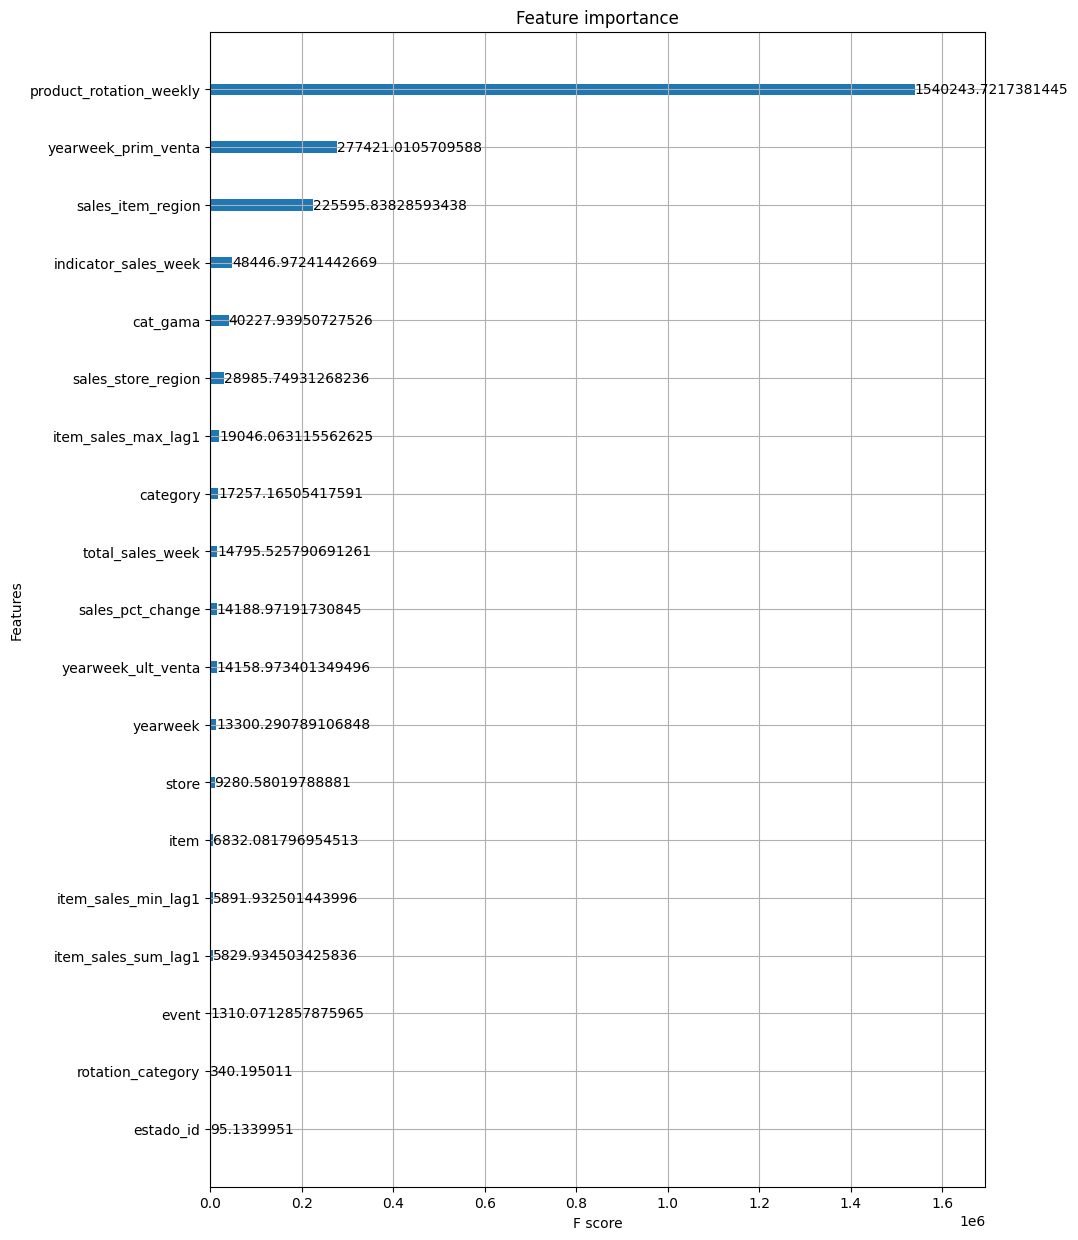

In [337]:
#grafico con modelo de XGBRegressor

fig, ax = plt.subplots(figsize = (10, 15))
xgb.plot_importance(model, importance_type = "gain", ax = ax);

In [338]:
#modelo de XGBRegressor

# Acceder a los resultados de la evaluación
results = model.evals_result()

In [339]:
#modelo de CatBoostRegressor

# Acceder a los resultados de la evaluación
#results = model.get_evals_result()

In [340]:
#modelo de CatBoostRegressor

#print(results.keys())

In [341]:
#modelo de XGBRegressor

# Extraer los RMSE para el conjunto de entrenamiento y validación
train_rmse = results['validation_0']['rmse']
valid_rmse = results['validation_1']['rmse']

In [342]:
#modelo de CatBoostRegressor

#train_rmse = results['learn']['RMSE']  # Asegúrate de que 'learn' y 'RMSE' coincidan con la salida del print anterior
#valid_rmse = results['validation']['RMSE']  # Igualmente aquí

In [343]:
# Asegurarse de que 'rounds' tenga la misma longitud que los datos de RMSE
rounds = list(range(1, len(train_rmse) + 1))

In [344]:
# Ahora 'rounds', 'train_rmse', y 'valid_rmse' deben tener la misma longitud.
# Verifica que es así
assert len(rounds) == len(train_rmse) == len(valid_rmse), "Las listas no tienen la misma longitud."

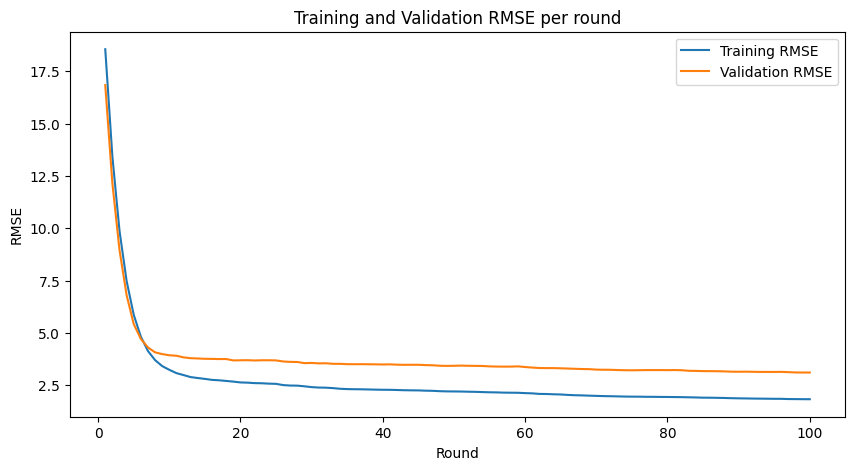

In [345]:
# Graficar los resultados
plt.figure(figsize=(10, 5))
plt.plot(rounds, train_rmse, label='Training RMSE')
plt.plot(rounds, valid_rmse, label='Validation RMSE')
plt.title('Training and Validation RMSE per round')
plt.xlabel('Round')
plt.ylabel('RMSE')
plt.legend()
plt.show()

<a id='prediction'></a>
### Prediction
[Volver al índice](#index)<br>

En este apartado vamos a utilizar el modelo entrenado para hacer una predicción y posteriormente enviar el submit a Kaggle.

In [346]:
if "sales" in X_test.columns:
    X_test.drop("sales", axis = 1, inplace = True)

Y_test_predict = model.predict(X_test)
X_test["sales"] = Y_test_predict

c:\Users\npere\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [347]:
X_test.reset_index(inplace = True)

In [348]:
Y_train_predict = model.predict(X_train)
Y_valida_predict = model.predict(X_valida)

rmse_train = np.sqrt(
    mean_squared_error(
        y_true = Y_train,
        y_pred = Y_train_predict
    )
)

rmse_valida = np.sqrt(
    mean_squared_error(
        y_true = Y_valida,
        y_pred = Y_valida_predict
    )
)

rmse_train= str(round(rmse_train, 3)).replace(".", "_")
rmse_valida = str(round(rmse_valida, 3)).replace(".", "_")

c:\Users\npere\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [349]:
print(f"Train RMSE: {rmse_train}")
print(f"Validation RMSE: {rmse_valida}")

Train RMSE: 1_833
Validation RMSE: 3_11


In [352]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
yearweek,48252.0,201615.500000,1.118046,201614.000000,201614.750000,201615.500000,201616.250000,201617.000000
item,48252.0,-0.517036,74.147414,-128.000000,-65.000000,0.000000,64.000000,127.000000
category,48252.0,1.711183,0.757067,1.000000,1.000000,2.000000,2.000000,3.000000
store,48252.0,5.497389,1.116076,4.000000,5.000000,5.000000,6.000000,7.000000
region,48252.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
event,48252.0,4.750000,3.766669,1.000000,1.000000,4.500000,8.250000,9.000000
yearweek_prim_venta,48252.0,201210.791677,131.683227,201104.000000,201105.000000,201126.000000,201315.000000,201607.000000
yearweek_ult_venta,48252.0,201616.119871,1.925229,201600.000000,201616.000000,201617.000000,201617.000000,201617.000000
estado_id,48252.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
indicator_sales_week,48252.0,0.779864,0.414342,0.000000,1.000000,1.000000,1.000000,1.000000


In [354]:
X_test["id"].nunique()

12063

In [360]:
# Redondear y convertir la columna 'sales' a números enteros
X_test['sales'] = X_test['sales'].round().apply(lambda x: max(0, int(x)))

In [361]:
# Filtrar para obtener las filas con ventas negativas y verificar la eliminación de los negativos
sales_negativos = X_test[X_test['sales'] < 0]
sales_negativos

,id,yearweek,item,category,store,region,event,yearweek_prim_venta,yearweek_ult_venta,estado_id,...,rotation_category,total_sales_week,sales_pct_change,cat_gama,sales_item_region,sales_store_region,item_sales_sum_lag1,item_sales_min_lag1,item_sales_max_lag1,sales


In [362]:
(
    X_test[["id","yearweek","sales"]]
    .to_csv(f"submission_train_{rmse_train}_valida_{rmse_valida}.csv", index = False)
)

In [363]:
# Primero, resetea el índice y crea una columna 'index'
df.reset_index(inplace=True)

# Luego, cambia el nombre de la columna 'index' a 'id'
df.rename(columns={'index': 'id'}, inplace=True)


C:\Users\npere\AppData\Local\Temp\ipykernel_23900\56845593.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'index': 'id'}, inplace=True)


In [364]:
# Filtrar filas en ambos DataFrames para contener solo las semanas específicas
df_original_filtrado = df[df['yearweek'].isin([201614.0, 201615.0, 201616.0, 201617.0])]
df_prediccion_filtrado = X_test[X_test['yearweek'].isin([201614.0, 201615.0, 201616.0, 201617.0])]


In [365]:
# Renombrar la columna en df_prediccion_filtrado para evitar conflictos
df_prediccion_filtrado.rename(columns={'sales': 'sales_prediction'}, inplace=True)

# Hacer la fusión usando 'id' y 'yearweek' como claves para la fusión
df_resultado = pd.merge(df_original_filtrado, df_prediccion_filtrado, on=['id', 'yearweek'])

# Calcula el porcentaje de diferencia
df_resultado['percentage_difference'] = ((df_resultado['sales'] - df_resultado['sales_prediction']) / df_resultado['sales']) * 100

# Ver el DataFrame actualizado
print(df_resultado[['id', 'yearweek', 'sales', 'sales_prediction', 'percentage_difference']])


                            id  yearweek  sales  sales_prediction  \
0       ACCESORIES_1_001_NYC_1  201614.0   11.0                10   
1       ACCESORIES_1_001_NYC_1  201615.0    7.0                 6   
2       ACCESORIES_1_001_NYC_1  201616.0    7.0                 8   
3       ACCESORIES_1_001_NYC_1  201617.0    1.0                 5   
4       ACCESORIES_1_001_NYC_2  201614.0    2.0                 2   
...                        ...       ...    ...               ...   
48247  SUPERMARKET_3_827_NYC_3  201617.0   13.0                43   
48248  SUPERMARKET_3_827_NYC_4  201614.0   10.0                32   
48249  SUPERMARKET_3_827_NYC_4  201615.0    0.0                 0   
48250  SUPERMARKET_3_827_NYC_4  201616.0   14.0                55   
48251  SUPERMARKET_3_827_NYC_4  201617.0    8.0                65   

       percentage_difference  
0                   9.090909  
1                  14.285714  
2                 -14.285714  
3                -400.000000  
4               

In [366]:
descargar = df_resultado[['id', 'yearweek', 'sales', 'sales_prediction', 'percentage_difference']]

In [367]:
descargar

,id,yearweek,sales,sales_prediction,percentage_difference
0,ACCESORIES_1_001_NYC_1,201614.0,11.0,10,9.090909
1,ACCESORIES_1_001_NYC_1,201615.0,7.0,6,14.285714
2,ACCESORIES_1_001_NYC_1,201616.0,7.0,8,-14.285714
3,ACCESORIES_1_001_NYC_1,201617.0,1.0,5,-400.000000
4,ACCESORIES_1_001_NYC_2,201614.0,2.0,2,0.000000
...,...,...,...,...,...
48247,SUPERMARKET_3_827_NYC_3,201617.0,13.0,43,-230.769231
48248,SUPERMARKET_3_827_NYC_4,201614.0,10.0,32,-220.000000
48249,SUPERMARKET_3_827_NYC_4,201615.0,0.0,0,NaN
48250,SUPERMARKET_3_827_NYC_4,201616.0,14.0,55,-292.857143


In [382]:
# 4 ultimas semanas
filtered_descargar = df.query('201514.0 <= yearweek <= 201517.0')[['yearweek', 'sales']]

# Agrupa por 'yearweek'
grouped_df = filtered_descargar.groupby('yearweek').sum()

# Muestra la tabla
display(grouped_df)

,sales
yearweek,
201514.0,109276.0
201515.0,104512.0
201516.0,107558.0
201517.0,109402.0


In [ ]:
# 4 ultimas semanas
filtered_descargar = descargar.query('201514.0 <= yearweek <= 201517.0')[['yearweek', 'sales']]

# Agrupa por 'yearweek'
grouped_descargar = filtered_descargar.groupby('yearweek').sum()

# Muestra la tabla
display(grouped_descargar)

In [369]:
#diferencia porcentual
grouped_descargar['percentage_difference'] = (grouped_descargar['sales_prediction'] - grouped_descargar['sales']) / grouped_descargar['sales'] * 100


display(grouped_descargar)

,sales,sales_prediction,percentage_difference
yearweek,,,
201614.0,131457.0,134938,2.648014
201615.0,123247.0,126033,2.260501
201616.0,124433.0,151326,21.612434
201617.0,23187.0,115572,398.434468


In [ ]:
#diferencia porcentual
grouped_descargar['percentage_difference'] = (grouped_descargar['sales_prediction'] - grouped_descargar['sales']) / grouped_descargar['sales'] * 100


display(grouped_descargar)

In [370]:
#df_resultado.to_csv('Predict_series_temporales.csv')

es normal tener predicciones negativas?


In [371]:
           sales	sales_prediction	percentage_difference
yearweek			
201614.0	313336.0	339322	8.293334
201615.0	298225.0	304040	1.949870
201616.0	287124.0	362255	26.166743
201617.0	49795.0	    256891	415.897178

SyntaxError: invalid syntax (435205032.py, line 1)